In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import numpy as np
from utils.metrics import *

Loading the results for training and validation

In [15]:

# model baseline
train_baseline = load_pickle("../results/runs/baseline_70_run_91251/results_training.pkl")
val_baseline = load_pickle("../results/runs/baseline_70_run_91251/results_validation.pkl")

# model attention
train_attention = load_pickle("../results/runs/attentionmil_68_run_91237/results_training.pkl")
val_attention = load_pickle("../results/runs/attentionmil_68_run_91237/results_validation.pkl")

# model additive
train_additive = load_pickle("../results/runs/additivemil_67_run_90956/results_training.pkl")
val_additive = load_pickle("../results/runs/additivemil_67_run_90956/results_validation.pkl")


Plotting the different metrics and the loss functions for the different k-folds

In [16]:
from utils.metrics import compute_metrics_per_epoch, plot_mean_std, plot_roc_curve_mean_std

Validation score comparison

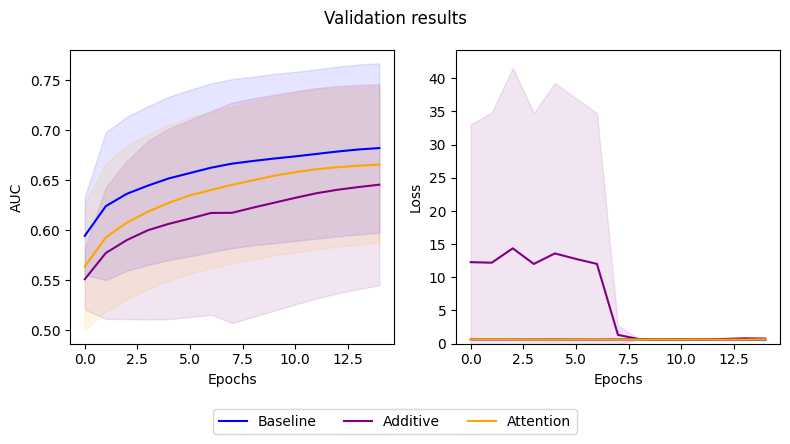

In [17]:
# get auc score for validation
val_additive_auc_mean, val_additive_auc_std = compute_metrics_per_epoch(val_additive, roc_auc_score)
val_attention_auc_mean, val_attention_auc_std = compute_metrics_per_epoch(val_attention, roc_auc_score)
val_baseline_auc_mean, val_baseline_auc_std = compute_metrics_per_epoch(val_baseline, roc_auc_score)

# get loss for validation
val_additive_loss_mean, val_additive_loss_std = compute_metrics_per_epoch(val_additive, "loss")
val_attention_loss_mean, val_attention_loss_std = compute_metrics_per_epoch(val_attention, "loss")
val_baseline_loss_mean, val_baseline_loss_std = compute_metrics_per_epoch(val_baseline, "loss")

# plot for validation
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0] = plot_mean_std(axes[0], val_baseline_auc_mean, val_baseline_auc_std, y_label="AUC", color="blue", label="Baseline")
axes[0] = plot_mean_std(axes[0], val_additive_auc_mean, val_additive_auc_std, y_label="AUC", color="purple", label="Additive")
axes[0] = plot_mean_std(axes[0], val_attention_auc_mean, val_attention_auc_std, y_label="AUC", color="orange", label="Attention")

axes[1] = plot_mean_std(axes[1], val_baseline_loss_mean, val_baseline_loss_std, y_label="Loss", color="blue", label="Baseline")
axes[1] = plot_mean_std(axes[1], val_additive_loss_mean, val_additive_loss_std, y_label="Loss", color="purple", label="Additive")
axes[1] = plot_mean_std(axes[1], val_attention_loss_mean, val_attention_loss_std, y_label="Loss", color="orange", label="Attention")
axes[1].set_ylim(ymin=0)

fig.suptitle('Validation results')
handles, labels = fig.gca().get_legend_handles_labels()  # Get handles and labels from the current axis
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
plt.tight_layout()
plt.show()

Score for training

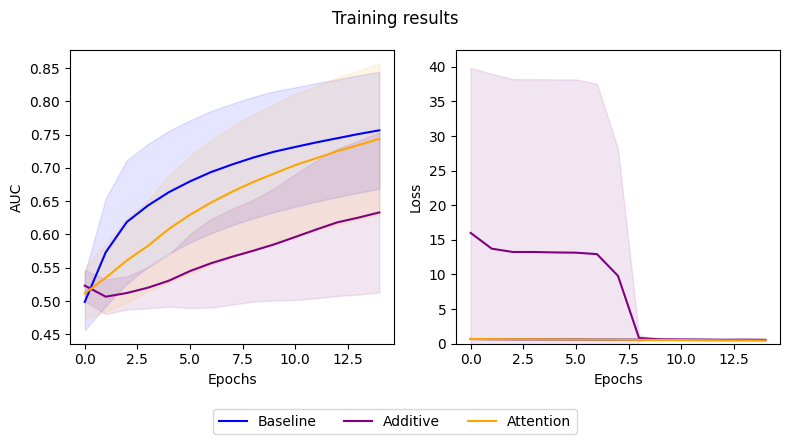

In [18]:
# get auc score for training
train_additive_auc_mean, train_additive_auc_std = compute_metrics_per_epoch(train_additive, roc_auc_score)
train_attention_auc_mean, train_attention_auc_std = compute_metrics_per_epoch(train_attention, roc_auc_score)
train_baseline_auc_mean, train_baseline_auc_std = compute_metrics_per_epoch(train_baseline, roc_auc_score)

# get loss for training
train_additive_loss_mean, train_additive_loss_std = compute_metrics_per_epoch(train_additive, "loss")
train_attention_loss_mean, train_attention_loss_std = compute_metrics_per_epoch(train_attention, "loss")
train_baseline_loss_mean, train_baseline_loss_std = compute_metrics_per_epoch(train_baseline, "loss")

# plot for training
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0] = plot_mean_std(axes[0], train_baseline_auc_mean, train_baseline_auc_std, y_label="AUC", color="blue", label="Baseline")
axes[0] = plot_mean_std(axes[0], train_additive_auc_mean, train_additive_auc_std, y_label="AUC", color="purple", label="Additive")
axes[0] = plot_mean_std(axes[0], train_attention_auc_mean, train_attention_auc_std, y_label="AUC", color="orange", label="Attention")

axes[1] = plot_mean_std(axes[1], train_baseline_loss_mean, train_baseline_loss_std, y_label="Loss", color="blue", label="Baseline")
axes[1] = plot_mean_std(axes[1], train_additive_loss_mean, train_additive_loss_std, y_label="Loss", color="purple", label="Additive")
axes[1] = plot_mean_std(axes[1], train_attention_loss_mean, train_attention_loss_std, y_label="Loss", color="orange", label="Attention")
axes[1].set_ylim(ymin=0)

fig.suptitle('Training results')
handles, labels = fig.gca().get_legend_handles_labels()  # Get handles and labels from the current axis
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0), ncol=3)
plt.tight_layout()
plt.show()

Plot the ROC curve for each fold

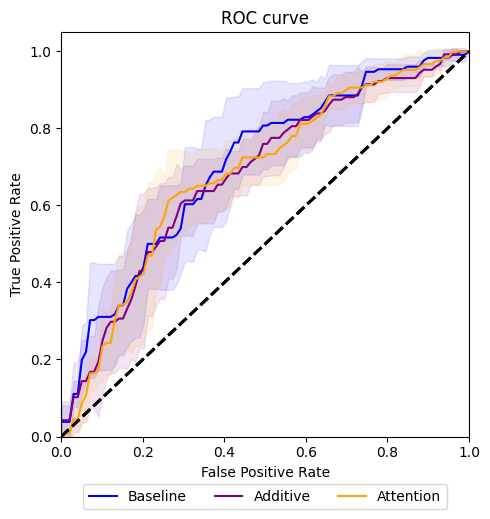

Additive -- mean: 0.68, std: 0.07 
Attention -- mean: 0.68, std: 0.06 
Baseline -- mean: 0.70, std: 0.08 


In [19]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax, aucs_baseline = plot_roc_curve_mean_std(ax, val_baseline, color="blue", label="Baseline")
ax, aucs_additive = plot_roc_curve_mean_std(ax, val_additive, color="purple", label="Additive")
ax, aucs_attention = plot_roc_curve_mean_std(ax, val_attention, color="orange", label="Attention")
plt.title("ROC curve")
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.show()
print("Additive -- mean: {:.2f}, std: {:.2f} ".format(np.mean(aucs_additive), np.std(aucs_additive)))
print("Attention -- mean: {:.2f}, std: {:.2f} ".format(np.mean(aucs_attention), np.std(aucs_attention)))
print("Baseline -- mean: {:.2f}, std: {:.2f} ".format(np.mean(aucs_baseline), np.std(aucs_baseline)))

